In [17]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("test_mul.csv")

# Separate features (X) and target (y)
X = df.drop('income', axis=1).values  # All columns except 'y'
y = df['income'].values.reshape(-1, 1)  # Target column

# Step 1: Shuffle the data
np.random.seed(42)  # for reproducibility
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# Step 2: 80/20 split
split_index = int(0.8 * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 3: Z-score normalization (standardization) for X
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std  # use train mean & std!

# Step 4: Initialize parameters
m, n = X_train_scaled.shape
w = np.random.uniform(low=-1.0, high=1.0, size=(n, 1))
b = 0.0


**# Linear Regression model from Scratch**

In [18]:
#Functions

def compute_cost(x, y, w, b):
    m,n = x.shape

    f_wb = np.dot(x,w) + b
    cost = (1/(2 *m)) * np.sum((f_wb - y)**2)
    return cost
    
def compute_gradient(x, y, w, b):
    m = x.shape[0]

    f_wb = np.dot(x, w) + b          # shape (m, 1)
    error = f_wb - y                 # shape (m, 1)

    dj_dw = (1/m) * np.dot(x.T, error)  # shape (n, 1)
    dj_db = (1/m) * np.sum(error)       # scalar

    return dj_dw, dj_db

def gradient_descent(lr, x, y, w, b, previous_cost, threshold, max_iters=1000000):
    m = x.shape[0]
    iters = 0

    while True:
        
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - (lr/m)*(dj_dw)
        b = b - (lr/m)*(dj_db)

        current_cost = compute_cost(x, y, w, b)

        if iters % 100 == 0:
            print(f"Iteration {iters} | Cost: {current_cost:.5f} | w: {w.ravel()} | b: {b:.5f}")
            
        if abs(current_cost-previous_cost) < threshold:
            print(f"Converged in {iters} iterations.")
            break

        previous_cost = current_cost
        iters += 1
        if iters >= max_iters:
            print("Stopped: Max iterations reached.")
            break


    return w , b 

def predict(x_test_scaled, w, b):
    return np.dot(x_test_scaled,w) + b
    

In [19]:
wf , bf = gradient_descent(0.002,X_train_scaled,y_train,w,b,previous_cost=float('inf'),threshold=1e-7)



Iteration 0 | Cost: 875016668.29247 | w: [-0.48289754  1.99209676] | b: 5.12953
Iteration 100 | Cost: 853225829.90358 | w: [ 50.37857801 101.93789518] | b: 514.85796
Iteration 200 | Cost: 831984550.12108 | w: [ 99.88705216 200.2770228 ] | b: 1018.25404
Iteration 300 | Cost: 811278772.62160 | w: [148.070912   297.03917766] | b: 1515.39645
Iteration 400 | Cost: 791094807.48435 | w: [194.95797802 392.25348447] | b: 2006.36287
Iteration 500 | Cost: 771419321.38867 | w: [240.57551528 485.94850573] | b: 2491.23003
Iteration 600 | Cost: 752239328.08287 | w: [284.95024438 578.15225281] | b: 2970.07370
Iteration 700 | Cost: 733542179.11678 | w: [328.10835219 668.89219664] | b: 3442.96871
Iteration 800 | Cost: 715315554.83027 | w: [370.07550236 758.19527831] | b: 3909.98896
Iteration 900 | Cost: 697547455.59034 | w: [410.87684563 846.08791943] | b: 4371.20742
Iteration 1000 | Cost: 680226193.26973 | w: [450.53702998 932.59603224] | b: 4826.69619
Iteration 1100 | Cost: 663340382.96001 | w: [ 489.

Testing the model

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
#y_pred_test = predict(x_test_scaled, wf, bf)
y_pred_test = predict(X_test_scaled, wf, bf)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"\n📊 Test Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



📊 Test Metrics (from sklearn):
Mean Squared Error (MSE): 3805010.5042
Mean Absolute Error (MAE): 1836.2012
R² Score: 0.9460


In [21]:
print("Final weight (w):", wf)
print("Final bias (b):", bf)

Final weight (w): [[-907.15364981]
 [8592.90367369]]
Final bias (b): 41036.24999996284


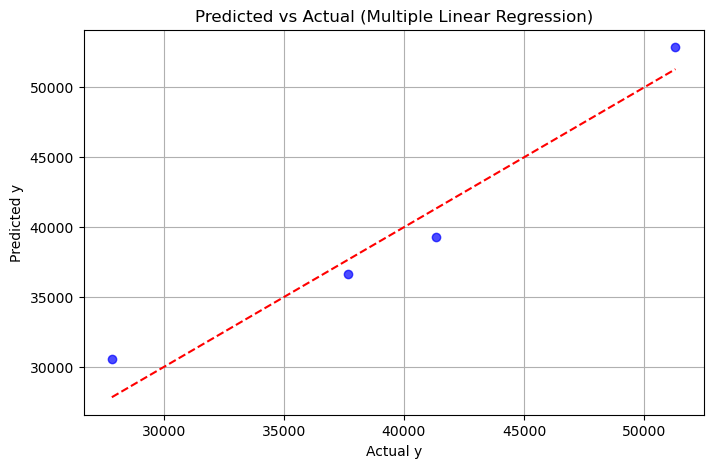

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Predicted vs Actual (Multiple Linear Regression)")
plt.grid(True)
plt.show()